## Food Establishments
“This set locates establishments under the responsibility of the Food Inspection Division 
of the City of Montreal. It should be noted that the City is mandated by the Ministère de l'Agriculture, 
des Pêcheries et de l'Alimentation du Québec (MAPAQ) with respect to inspections on its territory.” 

The data is provided as shape, csv and geojson. For the analysis the shape data is used. 

### Steps that are taken
- Load the shapefile containing business data and perform some analysis on the data

### Data source
- https://donnees.montreal.ca/dataset/etablissements-alimentaires
- Source: City of Montréal
- Accessed: 12.11.2023

In [1]:
# Import necessary libraries for geospatial, data manipulation, visualization, and clustering
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans

# Suppress warnings for better readability of the output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ensure the "Figures" directory exists
output_folder = "Figures"
os.makedirs(output_folder, exist_ok=True)

In [3]:
print("Current working directory:", os.getcwd())

Current working directory: /home/jovyan/work/Food_establishment


In [4]:
# Define the folder path (you can use an absolute or relative path)
folder_path = "/home/jovyan/work/Data/"

# Set the environment variable, for example 'MY_FOLDER'
os.environ["Data_folder"] = folder_path

# You can verify it's set by printing it
print("Environment variable Data_folder is set to:", os.environ["Data_folder"])

Environment variable Data_folder is set to: /home/jovyan/work/Data/


In [5]:
# Get the folder path from the environment variable
folder_path = os.environ.get("Data_folder")
if not folder_path:
    raise ValueError("The environment variable Data_folder is not set.")

In [6]:
# Construct the full path to the files we want to read
# and read the files using GeoPandas
# Load the csv file containing business data
file_path = os.path.join(folder_path, "Food_establishments/businesses.csv")
business_csv = gpd.read_file(file_path)
business_csv.head(5)

business_id                  name                             address  \
0         127  LES ENTREPRISES ALJO  12515   Boulevard Rodolphe-Forget    
1         135             PROVI-TOT            9128   Boulevard Perras    
2         138      LE PETIT TABLIER          690   Rue Sherbrooke Ouest   
3         140  RESTO-PUB MARCO POLO           7985   Avenue Marco-Polo    
4         146       BISTRO OLA KALA               522   Rue Jarry Ouest   

       city           state                       type  \
0  Montréal  Québec, Canada  Distributrice automatique   
1  Montréal  Québec, Canada  Épicerie avec préparation   
2  Montréal  Québec, Canada                 Restaurant   
3  Montréal  Québec, Canada                  Brasserie   
4  Montréal  Québec, Canada         Bar salon, taverne   

                          statut date_statut   latitude   longitude  \
0                         Ouvert    20031123  45.650661  -73.580264   
1  Fermé changement d'exploitant    20090821  45.650352  -73.577726   
2  Fermé changement d'exploitant    20090306  45.504673  -73.573766   
3                          Fermé    20230914   45.62598  -73.583592   
4  Fermé changement d'exploitant    20120921  45.531975  -73.635054   

           x           y geometry  
0  298544.13  5056754.99     None  
1  298741.88  5056720.54     None  
2  299035.65  5040530.65     None  
3  298281.88  5054012.39     None  
4  294251.47  5043570.93     None

In [7]:
# Load the GeoJSON file containing business data and display the first few rows
file_path = os.path.join(folder_path, "Food_establishments/businesses.geojson")
business_geojson = gpd.read_file(file_path)
business_geojson.head(5)

business_id                  name                             address  \
0          127  LES ENTREPRISES ALJO  12515   Boulevard Rodolphe-Forget    
1          135             PROVI-TOT            9128   Boulevard Perras    
2          138      LE PETIT TABLIER          690   Rue Sherbrooke Ouest   
3          140  RESTO-PUB MARCO POLO           7985   Avenue Marco-Polo    
4          146       BISTRO OLA KALA               522   Rue Jarry Ouest   

       city           state                       type  \
0  Montréal  Québec, Canada  Distributrice automatique   
1  Montréal  Québec, Canada  Épicerie avec préparation   
2  Montréal  Québec, Canada                 Restaurant   
3  Montréal  Québec, Canada                  Brasserie   
4  Montréal  Québec, Canada         Bar salon, taverne   

                          statut date_statut   latitude           longitude  \
0                         Ouvert    20031123  45.650661          -73.580264   
1  Fermé changement d'exploitant    20090821  45.650352          -73.577726   
2  Fermé changement d'exploitant    20090306  45.504673  -73.57376600000001   
3                          Fermé    20230914   45.62598          -73.583592   
4  Fermé changement d'exploitant    20120921  45.531975          -73.635054   

           x           y                    geometry  
0  298544.13  5056754.99  POINT (-73.58026 45.65066)  
1  298741.88  5056720.54  POINT (-73.57773 45.65035)  
2  299035.65  5040530.65  POINT (-73.57377 45.50467)  
3  298281.88  5054012.39  POINT (-73.58359 45.62598)  
4  294251.47  5043570.93  POINT (-73.63505 45.53197)

In [8]:
# Display the Coordinate Reference System (CRS) of the GeoJSON data
business_geojson.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# Load the shapefile containing business data
file_path = os.path.join(folder_path, "Food_establishments/businesses.shp")
food_establishments = gpd.read_file(file_path)

In [10]:
# Display the Coordinate Reference System (CRS) of the shapefile data
food_establishments.crs

<Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
food_establishments = food_establishments.to_crs(epsg=4326)
food_establishments.head()

business_i                  name                            address  \
0         127  LES ENTREPRISES ALJO  12515   Boulevard Rodolphe-Forget   
1         135             PROVI-TOT            9128   Boulevard Perras   
2         138      LE PETIT TABLIER         690   Rue Sherbrooke Ouest   
3         140  RESTO-PUB MARCO POLO           7985   Avenue Marco-Polo   
4         146       BISTRO OLA KALA              522   Rue Jarry Ouest   

       city           state                       type  \
0  Montréal  Québec, Canada  Distributrice automatique   
1  Montréal  Québec, Canada  Épicerie avec préparation   
2  Montréal  Québec, Canada                 Restaurant   
3  Montréal  Québec, Canada                  Brasserie   
4  Montréal  Québec, Canada         Bar salon, taverne   

                          statut date_statu   latitude           longitude  \
0                         Ouvert   20031123  45.650661          -73.580264   
1  Fermé changement d'exploitant   20090821  45.650352          -73.577726   
2  Fermé changement d'exploitant   20090306  45.504673  -73.57376600000001   
3                          Fermé   20230914   45.62598          -73.583592   
4  Fermé changement d'exploitant   20120921  45.531975          -73.635054   

           x           y                    geometry  
0  298544.13  5056754.99  POINT (-73.58026 45.65066)  
1  298741.88  5056720.54  POINT (-73.57773 45.65035)  
2  299035.65  5040530.65  POINT (-73.57377 45.50467)  
3  298281.88  5054012.39  POINT (-73.58359 45.62598)  
4  294251.47  5043570.93  POINT (-73.63505 45.53197)

In [12]:
# Check the shape (number of rows and columns) of the data
food_establishments.shape

(26646, 13)

In [13]:
# Get unique values in the 'type' column to explore business categories
selected_column = "type"
categories = food_establishments[selected_column].unique()
print(categories)

['Distributrice automatique' 'Épicerie avec préparation' 'Restaurant'
 'Brasserie' 'Bar salon, taverne' 'Restaurant service rapide'
 'Supermarché' 'Garderie' 'Magasin à rayons' "Centre d'accueil" 'Épicerie'
 "Cafétéria institution d'enseignement" 'Boucherie-épicerie' 'Cafétéria'
 'Casse-croûte' 'Résidence de personnes âgées' 'Boulangerie'
 "Organisme d'aide alimentaire" 'Restaurant mets pour emporter'
 'École/mesures alimentaires' 'Bar laitier saisonnier' 'Poissonnerie'
 'Charcuterie/fromage' 'Pâtisserie' 'Confiserie/chocolaterie' 'Boucherie'
 'Aliments naturels' 'Traiteur' 'Autres' 'Entrepôt' 'Kiosque' 'Hôpital'
 'Événements spéciaux' 'Charcuterie' 'Pâtisserie-dépôt' 'Bar laitier'
 'Cuisine domestique' 'Local de préparation' 'Usine produit autre'
 'Usine de produits marins' 'Marché public'
 'Distributeur en gros de produits mixtes' 'Vendeur itinérant'
 'Entrepôt de produits mixtes' 'Entrepôt de produits végétaux'
 'Distributeur en gros de produits laitiers'
 'Camp de vacances / Auberg

In [14]:
# Get the counts of each unique value in the 'type' column
counts = food_establishments['type'].value_counts()
print(counts)

type
Restaurant                                            7086
Épicerie                                              2903
Restaurant service rapide                             2552
Épicerie avec préparation                             1669
Casse-croûte                                          1363
                                                      ... 
Découpe à forfait                                        1
Atelier de conditionnement de produits de la pêche       1
Camp de vacances / Auberge jeunesse / Gîte               1
Site d'eau vendue au volume                              1
Cabane à sucre                                           1
Name: count, Length: 73, dtype: int64


In [15]:
# Get the counts of each unique value in the 'statut' column (status of businesses)
counts = food_establishments['statut'].value_counts()
print(counts)

statut
Fermé changement d'exploitant    10684
Fermé                            10350
Ouvert                            5493
Sous inspection fédérale           114
En traitement                        5
Name: count, dtype: int64


In [16]:
# Convert the counts of 'type' to a DataFrame for better readability
counts = food_establishments['type'].value_counts().reset_index()
counts.columns = ['Type', 'Count']
print(counts)

                                                 Type  Count
0                                          Restaurant   7086
1                                            Épicerie   2903
2                           Restaurant service rapide   2552
3                           Épicerie avec préparation   1669
4                                        Casse-croûte   1363
..                                                ...    ...
68                                  Découpe à forfait      1
69  Atelier de conditionnement de produits de la p...      1
70         Camp de vacances / Auberge jeunesse / Gîte      1
71                        Site d'eau vendue au volume      1
72                                     Cabane à sucre      1

[73 rows x 2 columns]


In [17]:
# # Filter the data into active and inactive businesses based on their status
# df_active = food_establishments[food_establishments['statut'] == 'Ouvert']
# df_inactive = food_establishments[(food_establishments['statut'] == 'Fermé') | (food_establishments['statut'] == "Fermé changement d'exploitant")]

In [18]:
df_inactive = food_establishments[food_establishments['statut'] == 'Fermé']
df_active = food_establishments[food_establishments['statut'].isin(["Ouvert", "Fermé changement d'exploitant", "En traitement", "Sous inspection fédérale"])]

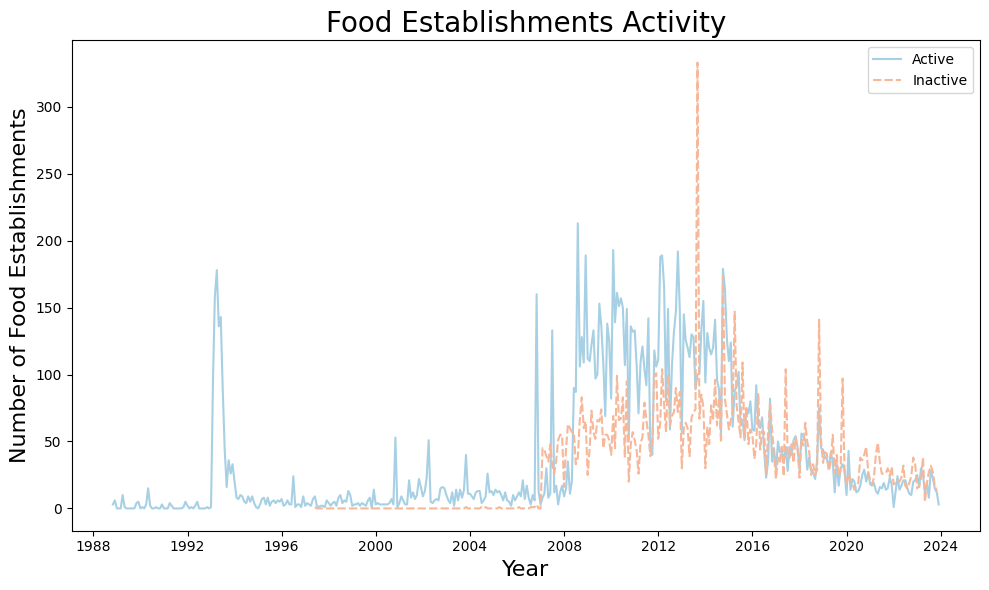

In [19]:
# Convert 'date_statu' column to datetime format
df_active['date_statu'] = pd.to_datetime(df_active['date_statu'])
df_inactive['date_statu'] = pd.to_datetime(df_inactive['date_statu'])

# Resample data by month to create a time series
time_series_active = df_active.set_index('date_statu').resample('M').size()
time_series_inactive = df_inactive.set_index('date_statu').resample('M').size()

# Combine the active and inactive time series into a single DataFrame
time_series_data = pd.DataFrame({
    'Active': time_series_active,
    'Inactive': time_series_inactive
})

# Plot the time series of active and inactive businesses
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series_data, palette='RdBu_r')
plt.title('Food Establishments Activity', size=20)
plt.xlabel('Year', size=16)
plt.ylabel('Number of Food Establishments', size=16)

# Save the figure in the "Figures" folder and show the plot
plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_establishments_activity_over_time.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [20]:
# # Filter the DataFrame for dates after 2008-12-31
# # filtered_df = time_series_data.loc[time_series_data.index > pd.Timestamp('2008-12-31')]
# filtered_df = time_series_data.loc[time_series_data.index]
# # Assume df is your DataFrame
# filtered_df.to_csv('my_data.csv', index=True)

In [21]:
# Filter the data to exclude records with statuses 'En traitement' and 'Sous inspection fédérale'
food_establishments_filtered = food_establishments.query("statut != 'En traitement' and statut != 'Sous inspection fédérale'")

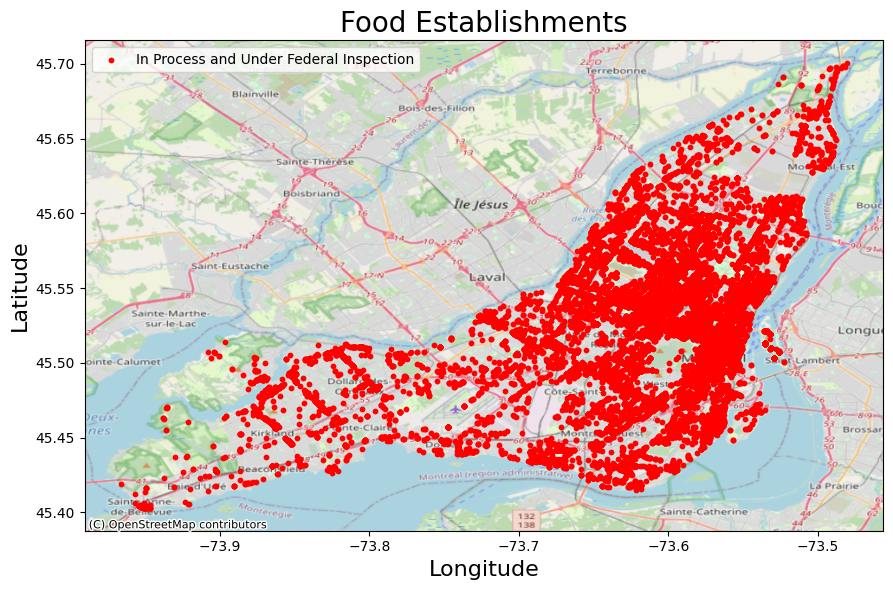

In [22]:
# Plot the filtered data on a map with OpenStreetMap as the background
fig, ax = plt.subplots(figsize=(10, 6))
food_establishments_filtered.plot(ax=ax, color='red', markersize=10, label='In Process and Under Federal Inspection')

ax.set_title('Food Establishments', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)

# Add OpenStreetMap as the basemap
ctx.add_basemap(ax, crs=food_establishments_filtered.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.legend()

# Save the figure in the "Figures" folder and show the plot
plt.tight_layout()
output_path = os.path.join(output_folder, 'Map_food_establishments_in_process_and_under_federal_inspection.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

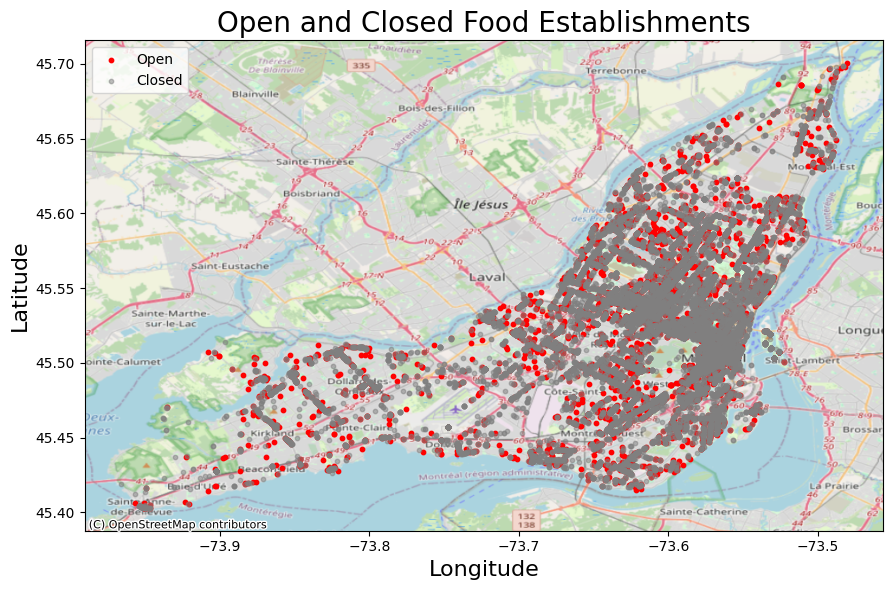

In [23]:
# Separate points based on their 'statut' (Open and Closed)
ouvert = food_establishments_filtered[food_establishments_filtered['statut'] == 'Ouvert']
ferme = food_establishments_filtered[(food_establishments_filtered['statut'] == 'Fermé') | (food_establishments_filtered['statut'] == 'Fermé changement d\'exploitant')]

# Plot points for both 'Ouvert' and 'Fermé' statuses with different colors
fig, ax = plt.subplots(figsize=(10, 6))
ouvert.plot(ax=ax, color='red', markersize=10, label='Open')
ferme.plot(ax=ax, color='grey', alpha=0.5, markersize=10, label='Closed')

ax.set_title('Open and Closed Food Establishments', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)

# Add OpenStreetMap as the basemap
ctx.add_basemap(ax, crs=food_establishments_filtered.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.legend()

# Save the figure in the "Figures" folder and show the plot
plt.tight_layout()
output_path = os.path.join(output_folder, 'Map_food_establishments_open_and_closed.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

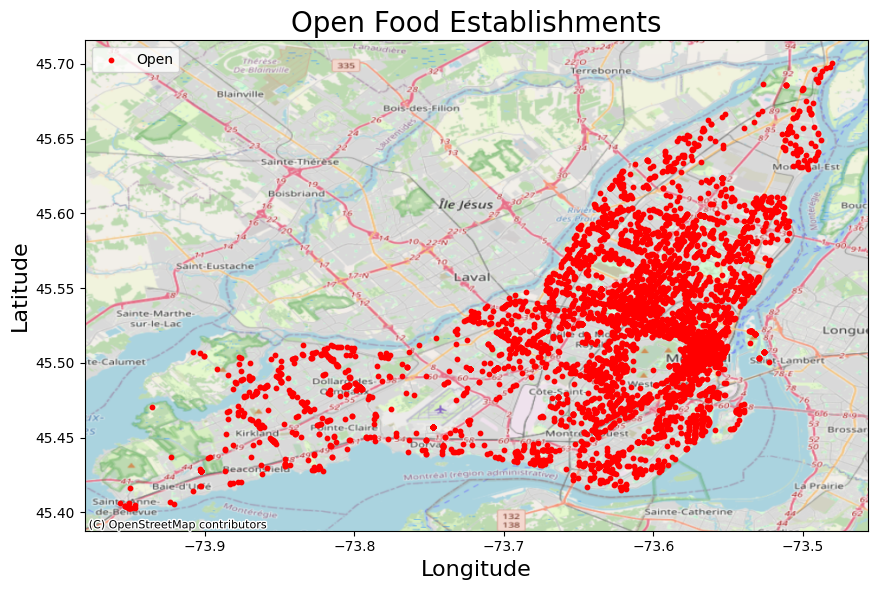

In [24]:
# Focus on businesses with 'statut' as 'Ouvert' and plot them
ouvert = food_establishments_filtered[food_establishments_filtered['statut'] == 'Ouvert']
fig, ax = plt.subplots(figsize=(10, 6))
ouvert.plot(ax=ax, color='red', markersize=10, label='Open')

ax.set_title('Open Food Establishments', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)

# Add OpenStreetMap as the basemap
ctx.add_basemap(ax, crs=food_establishments_filtered.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.legend()

# Save the figure in the "Figures" folder and show the plot
plt.tight_layout()
output_path = os.path.join(output_folder, 'Map_food_establishments_open.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

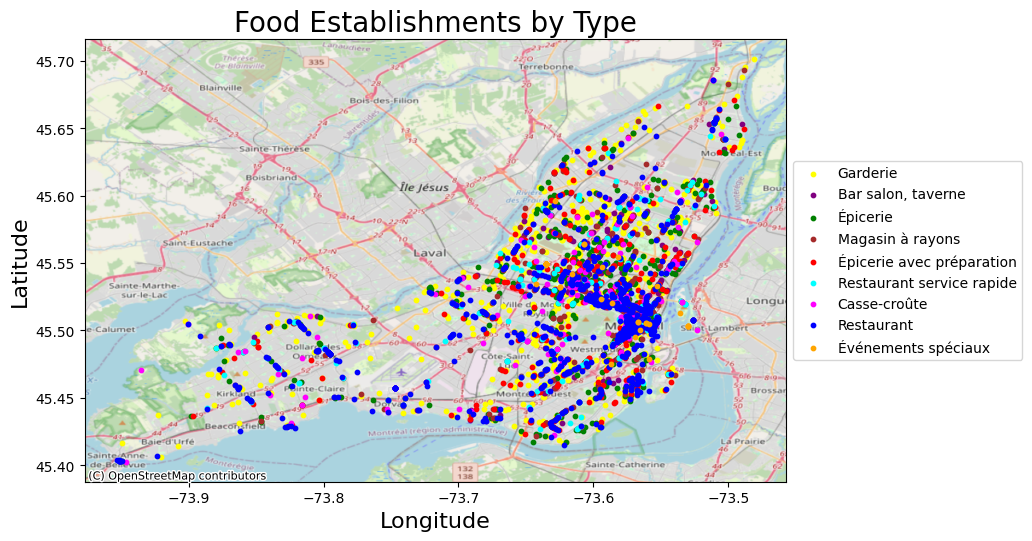

In [25]:
# Filter businesses by specific categories within 'Ouvert' data
ouvert = food_establishments_filtered[food_establishments_filtered['statut'] == 'Ouvert']

selected_categories = [
    'Restaurant', 'Épicerie', 'Événements spéciaux',
    'Épicerie avec préparation', 'Restaurant service rapide','Casse-croûte', 'Garderie', 'Bar salon, taverne', 'Magasin à rayons']

ouvert_selected = ouvert[ouvert['type'].isin(selected_categories)]

# Plot businesses by type with distinct colors
fig, ax = plt.subplots(figsize=(10, 6))
unique_types = ouvert_selected['type'].unique()
color_map = {
    'Restaurant': 'blue',
    'Épicerie': 'green',
    'Événements spéciaux': 'orange',
    'Épicerie avec préparation': 'red',
    'Restaurant service rapide': 'cyan',
    'Casse-croûte': 'magenta',
    'Garderie': 'yellow',
    'Bar salon, taverne': 'purple',
    'Magasin à rayons': 'brown'
}

# Render points with different colors according to type and add legend
for typ in unique_types:
    ouvert_selected[ouvert_selected['type'] == typ].plot(ax=ax, color=color_map.get(typ, 'red'), markersize=10, label=typ)

ax.set_title('Food Establishments by Type', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)

# Add OpenStreetMap as the basemap
ctx.add_basemap(ax, crs=food_establishments_filtered.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Save the figure in the "Figures" folder and show the plot
plt.tight_layout()
output_path = os.path.join(output_folder, 'Map_food_establishments_open.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [26]:
# Ensure valid numeric data for 'latitude' and 'longitude', and remove NaN values
ouvert_selected = ouvert[ouvert['type'].isin(selected_categories)]

# Remove rows with empty values in 'longitude' and 'latitude'
ouvert_selected = ouvert_selected[ouvert_selected['longitude'] != '']
ouvert_selected = ouvert_selected[ouvert_selected['latitude'] != '']

ouvert_selected['longitude'] = pd.to_numeric(ouvert_selected['longitude'], errors='coerce')
ouvert_selected['latitude'] = pd.to_numeric(ouvert_selected['latitude'], errors='coerce')

ouvert_selected.loc[:, 'longitude'] = pd.to_numeric(ouvert_selected['longitude'], errors='coerce')
ouvert_selected.loc[:, 'latitude'] = pd.to_numeric(ouvert_selected['latitude'], errors='coerce')

# Filter rows with missing latitude or longitude values
ouvert_selected = ouvert_selected.dropna(subset=['latitude', 'longitude'])

In [27]:
# Use KMeans clustering to calculate density for each restaurant type
restaurant_types = ouvert_selected['type'].unique()
density_values = {}
for restaurant_type in restaurant_types:
    type_data = ouvert_selected[ouvert_selected['type'] == restaurant_type]
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(type_data[['latitude', 'longitude']])
    density_values[restaurant_type] = len(kmeans.labels_)

# Assign colors to clusters based on density
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'gray']
color_mapping = {}
sorted_densities = sorted(density_values.items(), key=lambda x: x[1], reverse=True)
for i, (restaurant_type, _) in enumerate(sorted_densities):
    color_mapping[restaurant_type] = colors[i % len(colors)]

# Create an interactive map with Folium
map = folium.Map(location=[45.5, -73.6], zoom_start=10.8)
marker_cluster = MarkerCluster().add_to(map)

# Add markers to the map
for idx, row in ouvert_selected.iterrows():
    popup_text = f"Name: {row['name']}<br>Type: {row['type']}<br>Latitude: {row['latitude']}<br>Longitude: {row['longitude']}"
    color = color_mapping.get(row['type'], 'gray')
    folium.CircleMarker(
        [row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=popup_text
    ).add_to(marker_cluster)

# Add a legend to the map
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 240px; height: 210px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">&nbsp; Legend <br>'''
for restaurant_type, color in color_mapping.items():
    legend_html += f'&nbsp; <i class="fa fa-circle" style="color:{color}"></i> {restaurant_type} <br>'
legend_html += '</div>'
map.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file and display it
output_path = os.path.join(output_folder, 'Food_establishments_interactive_map.html')
map.save(output_path)
map